# Load data

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [81]:
import scanpy as sc

#combined_adata = ad.read_h5ad('/storage/users/sac43cg/res_Samantha_1/outs/per_sample_outs/combined_adata.h5ad')
#adata = sc.read("/storage/users/sac43cg/res_Samantha_1/outs/per_sample_outs/filtered_preprocessed_combined_adata.h5ad")
#adata = sc.read("/storage/users/sac43cg/res_Samantha_1/outs/per_sample_outs/annotated_adata.h5ad")
adata = sc.read("/storage/users/sac43cg/res_Samantha_1/outs/per_sample_outs/clustered_adata.h5ad")
#adata = sc.read("/storage/users/sac43cg/res_Samantha_1/outs/per_sample_outs/cellcycle_adata.h5ad")

In [82]:
adata

AnnData object with n_obs × n_vars = 10594 × 2000
    obs: 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_cmo', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'leiden', 'leiden_combined', 'louvain', 'louvain_combined'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'CMO', 'gene_symbol', 'mito', 'ribo', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'condition_colors', 'hvg', 'leiden', 'leiden_combined_colors', 'log1p', 'louvain', 'louvain_combined_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

# Test Data distributions

In [83]:
# Step 1: Generate or input your data (replace with your data)
data = np.random.lognormal(mean=0, sigma=1, size=1000)
print(type(data))
print(data.shape)

<class 'numpy.ndarray'>
(1000,)


In [84]:
first_column = adata.X[:, 0]
data = first_column.toarray()
print(type(data))
print(data.shape)
data = data[np.isfinite(data)]

<class 'numpy.ndarray'>
(10594, 1)


In [85]:
if len(data.shape) > 1 and data.shape[1] == 1:  # if it's a column vector
    data = data.ravel()

In [86]:
print(data.shape)

(10594,)


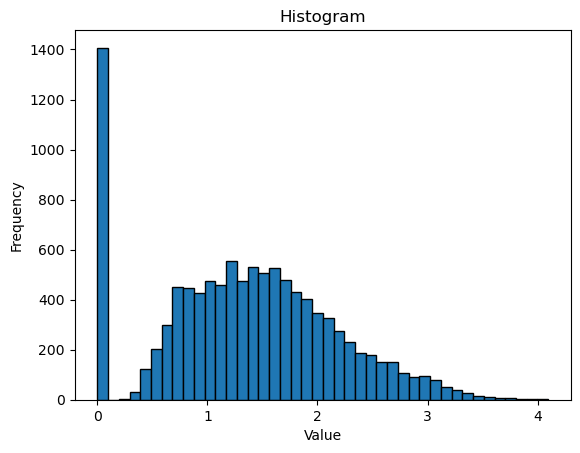

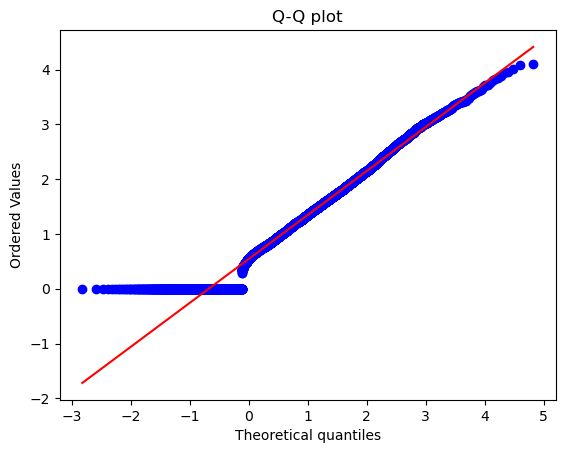

K-S statistic: 0.1811608676107626
P-value: 1.035646857406889e-304
Reject the null hypothesis, the data does not follow a lognormal distribution.


In [87]:
# Step 2: Visual Inspection using a histogram
plt.hist(data, bins='auto', edgecolor='black')
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Step 3: Q-Q plot
stats.probplot(data, dist='norm', sparams=(1,), plot=plt)
plt.title('Q-Q plot')
plt.show()

# Step 4: Statistical test (Kolmogorov-Smirnov test)
# Here, we use the lognormal distribution as the comparison distribution
D, p_value = stats.kstest(data, 'norm', args=(1,))
print(f'K-S statistic: {D}')
print(f'P-value: {p_value}')

# Interpretation
if p_value > 0.05:
    print('Fail to reject the null hypothesis, the data follows a lognormal distribution.')
else:
    print('Reject the null hypothesis, the data does not follow a lognormal distribution.')

In [88]:
import powerlaw

# Fit the data to a power-law distribution
fit = powerlaw.Fit(data)

# Print out the alpha parameter (scaling exponent) of the power-law fit
print(fit.power_law.alpha)

# Compare the power-law fit to an exponential fit, for instance
R, p = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)

print(R, p)

ModuleNotFoundError: No module named 'powerlaw'

In [89]:
print(adata.obs['condition'])

barcode
AAACCCAGTAGGCTCC-1         CTRL_1
AAACCCAGTCGCAACC-1         CTRL_1
AAACCCATCCACAAGT-1         CTRL_1
AAACGCTTCACTACGA-1         CTRL_1
AAACGCTTCAGCCTCT-1         CTRL_1
                         ...     
TTTACTGTCATTACTC-1    TGFb1_GEM_2
TTTCACAGTGATATAG-1    TGFb1_GEM_2
TTTCACATCGATGCAT-1    TGFb1_GEM_2
TTTCATGTCCCTCTAG-1    TGFb1_GEM_2
TTTGACTGTTCCGGTG-1    TGFb1_GEM_2
Name: condition, Length: 10594, dtype: category
Categories (8, object): ['CTRL_1', 'CTRL_2', 'CTRL_2D', 'GEM_2', 'TGFb1_1', 'TGFb1_2', 'TGFb1_GEM_1', 'TGFb1_GEM_2']


In [90]:
adata.obs['condition'].cat.categories


Index(['CTRL_1', 'CTRL_2', 'CTRL_2D', 'GEM_2', 'TGFb1_1', 'TGFb1_2',
       'TGFb1_GEM_1', 'TGFb1_GEM_2'],
      dtype='object')

# Differential expression analysis 


## Compare all condition 

In [91]:
# Specify the groups you want to compare
categories_list = list(adata.obs['condition'].cat.categories)
print(categories_list)

#conditions = ['CTRL_1', 'CTRL_2', 'CTRL_2D', 'GEM_2', 'TGFb1_1', 'TGFb1_2', 'TGFb1_GEM_1', 'TGFb1_GEM_2']
conditions = categories_list


['CTRL_1', 'CTRL_2', 'CTRL_2D', 'GEM_2', 'TGFb1_1', 'TGFb1_2', 'TGFb1_GEM_1', 'TGFb1_GEM_2']


## Compare all clusters

In [92]:
print(adata.obs['leiden'])


barcode
AAACCCAGTAGGCTCC-1     1
AAACCCAGTCGCAACC-1    11
AAACCCATCCACAAGT-1     5
AAACGCTTCACTACGA-1     8
AAACGCTTCAGCCTCT-1     6
                      ..
TTTACTGTCATTACTC-1    14
TTTCACAGTGATATAG-1     3
TTTCACATCGATGCAT-1     3
TTTCATGTCCCTCTAG-1     7
TTTGACTGTTCCGGTG-1     3
Name: leiden, Length: 10594, dtype: category
Categories (18, object): ['0', '1', '2', '3', ..., '14', '15', '16', '17']


In [93]:
unique_values = np.unique([int(x) for x in adata.obs['leiden'].values])
print(unique_values)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


In [94]:
#leidens = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' 10', '13', '14', '15', '16']
leidens = unique_values

## Create dictionary ensembl2symbol

In [95]:
from biomart import BiomartServer

# Connect to the BioMart server
server = BiomartServer("http://ensembl.org/biomart")

# Select the human genes dataset
dataset = server.datasets['hsapiens_gene_ensembl']

# Query BioMart to get the translation from Ensembl ID to gene symbol
response = dataset.search({
    'attributes': ['ensembl_gene_id', 'external_gene_name'],
})

# Initialize an empty dictionary to store the mapping
ensembl_to_gene_name = {}

# Iterate through the response lines
for line in response.iter_lines():
    # Decode the line and split it into Ensembl ID and gene name
    decoded_line = line.decode('utf-8')
    ensembl_id, gene_name = decoded_line.split('\t')
    
    # Store the mapping in the dictionary
    ensembl_to_gene_name[ensembl_id] = gene_name

# Now, ensembl_to_gene_name is a dictionary with Ensembl IDs as keys and gene names as values.


## translations

### example translations

In [11]:
#adata.var['gene_symbol'] = [ensembl_to_gene_name.get(gene_id, 'NA') for gene_id in adata.var_names]

In [96]:
#adata.var_names = [ensembl_to_gene_name.get(gene_id, gene_id) for gene_id in adata.var_names]

# Differential Analysis

## get information of your single cell object

In [97]:
print(adata)

AnnData object with n_obs × n_vars = 10594 × 2000
    obs: 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_cmo', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'leiden', 'leiden_combined', 'louvain', 'louvain_combined'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'CMO', 'gene_symbol', 'mito', 'ribo', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'condition_colors', 'hvg', 'leiden', 'leiden_combined_colors', 'log1p', 'louvain', 'louvain_combined_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


### get information about how the counts are store
### log transformed?
### sometimes the base of the logtransformation is not stored properly. this information can be added afterwards. 

In [98]:
if 'log1p' in adata.uns and 'base' not in adata.uns['log1p']:
    adata.uns['log1p']['base'] = np.e  # Assuming natural logarithm was used. Change accordingly if it was a different base.

## Comparison of all vs. all

In [99]:
comparisons = []
for i in range(len(conditions)):
    for j in range(i+1, len(conditions)):
        comparisons.append((conditions[i], conditions[j]))

In [100]:
import scanpy as sc

for group1, group2 in comparisons:
    # Subset the data for only the two groups you're comparing
    subset = adata[adata.obs['condition'].isin([group1, group2])]
    
    # Mark these two conditions in the subset
    subset.obs['group_comparison'] = subset.obs['condition'].astype(str)
    
    # Differential expression analysis
    sc.tl.rank_genes_groups(subset, 'group_comparison', method='wilcoxon')
    
    # You can then retrieve and store/save the results for this comparison
    # For instance:
    result = subset.uns['rank_genes_groups']
    # Store or further process the result

/tmp/ipykernel_1284105/2868860013.py:8: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  subset.obs['group_comparison'] = subset.obs['condition'].astype(str)
/tmp/ipykernel_1284105/2868860013.py:8: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  subset.obs['group_comparison'] = subset.obs['condition'].astype(str)
/tmp/ipykernel_1284105/2868860013.py:8: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  subset.obs['group_comparison'] = subset.obs['condition'].astype(str)
/tmp/ipykernel_1284105/2868860013.py:8: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  subset.obs['group_comparison'] = subset.obs['condition'].astype(str)
/tmp/ipykernel_1284105/2868860013.py:8: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  subset.ob

## Comparison contions vs. all other conditions

In [101]:
import scanpy as sc
import pandas as pd

# Initialize an empty dataframe to store results
results_df = pd.DataFrame()

# Example conditions
# conditions = ['CTRL_1', 'CTRL_2', 'CTRL_2D', 'GEM_2', 'TGFb1_1', 'TGFb1_2', 'TGFb1_GEM_1', 'TGFb1_GEM_2']
# Example dictionary mapping Ensembl IDs to gene names
# ensembl_to_gene_name = {...}  

for condition in conditions:
    # Create a new column for grouping: the condition vs. all others
    adata.obs['grouping'] = ['target' if x == condition else 'others' for x in adata.obs['condition']]
    
    # Perform differential expression
    sc.tl.rank_genes_groups(adata, 'grouping', method='wilcoxon', n_genes=adata.shape[1])
    
    # Convert result to dataframe
    result = pd.DataFrame({
        'ID': adata.uns['rank_genes_groups']['names']['target'],
        'log2FC': adata.uns['rank_genes_groups']['logfoldchanges']['target'],
        'p.value': adata.uns['rank_genes_groups']['pvals']['target'],
        'adjusted.p.value': adata.uns['rank_genes_groups']['pvals_adj']['target']
    })

    # Calculate basemean expression for genes present in adata.var_names
    result['basemean'] = [
        (adata[:, gene].X.sum() / adata.shape[0]) if gene in adata.var_names else 'NA' 
        for gene in result['ID']
    ]

    # Convert ensembl IDs to gene symbols
    result['symbol'] = result['ID'].map(ensembl_to_gene_name).fillna(result['ID'])

    # Assign comparison name
    result['comparison'] = condition + "_vs_others"

    # Append result to the main dataframe
    results_df = pd.concat([results_df, result])

In [103]:
print(results_df)

                   ID    log2FC       p.value  adjusted.p.value  basemean  \
0     ENSG00000176171  1.748443  0.000000e+00      0.000000e+00  2.080871   
1     ENSG00000170345  2.931980  0.000000e+00      0.000000e+00  0.855127   
2     ENSG00000234741  1.802805  0.000000e+00      0.000000e+00  2.287247   
3     ENSG00000196352  2.583366  0.000000e+00      0.000000e+00  0.886835   
4     ENSG00000177410  1.210990  0.000000e+00      0.000000e+00  2.994796   
...               ...       ...           ...               ...       ...   
1995  ENSG00000087086 -0.913274  3.445712e-68      2.650547e-66  3.922895   
1996  ENSG00000170421 -1.676459  9.608099e-69      8.354869e-67  1.371500   
1997  ENSG00000152056 -2.923657  1.761326e-70      1.761326e-68  0.767639   
1998  ENSG00000107984 -3.204330  2.781010e-73      2.927379e-71  0.932679   
1999  ENSG00000111057 -2.303637  1.449464e-98      9.663090e-96  1.790049   

     symbol             comparison  
0     BNIP3       CTRL_1_vs_others  
1

In [104]:
# Reorder columns
results_df = results_df[['comparison', 'ID', 'symbol', 'basemean', 'log2FC', 'p.value', 'adjusted.p.value']]


In [105]:
# write to file location
results_df.to_csv("/storage/users/sac43cg/res_Samantha_1/outs/per_sample_outs/diff_anaylsis_conditions_results_df.csv", index=False)

# Visualize the results

In [106]:
import pandas as pd
results_df = pd.read_csv("/storage/users/sac43cg/res_Samantha_1/outs/per_sample_outs/diff_anaylsis_conditions_results_df.csv")

In [107]:
adata

AnnData object with n_obs × n_vars = 10594 × 2000
    obs: 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_cmo', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'leiden', 'leiden_combined', 'louvain', 'louvain_combined', 'grouping'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'CMO', 'gene_symbol', 'mito', 'ribo', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'condition_colors', 'hvg', 'leiden', 'leiden_combined_colors', 'log1p', 'louvain', 'louvain_combined_colors', 'neighbors', 'pca', 'umap', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [108]:
sorted_unique_comparisons = sorted(results_df['comparison'].unique())
print(sorted_unique_comparisons)

['CTRL_1_vs_others', 'CTRL_2D_vs_others', 'CTRL_2_vs_others', 'GEM_2_vs_others', 'TGFb1_1_vs_others', 'TGFb1_2_vs_others', 'TGFb1_GEM_1_vs_others', 'TGFb1_GEM_2_vs_others']


## Visualize Top Genes for the comparions conditions vs all other

['CTRL_1_vs_others', 'CTRL_2D_vs_others', 'CTRL_2_vs_others', 'GEM_2_vs_others', 'TGFb1_1_vs_others', 'TGFb1_2_vs_others', 'TGFb1_GEM_1_vs_others', 'TGFb1_GEM_2_vs_others']
                  comparison               ID     symbol  basemean    log2FC  \
14003  TGFb1_GEM_2_vs_others  ENSG00000108821     COL1A1  0.756694  2.995284   
15998  TGFb1_GEM_2_vs_others  ENSG00000107984       DKK1  0.924627 -3.202408   
14016  TGFb1_GEM_2_vs_others  ENSG00000075420     FNDC3B  1.553259  1.268599   
14012  TGFb1_GEM_2_vs_others  ENSG00000101384       JAG1  0.528568  2.059722   
15999  TGFb1_GEM_2_vs_others  ENSG00000111057      KRT18  1.780726 -2.287763   
14009  TGFb1_GEM_2_vs_others  ENSG00000272763  LINC03057  1.355579  1.338923   
14013  TGFb1_GEM_2_vs_others  ENSG00000113083        LOX  0.391282  2.780166   
14015  TGFb1_GEM_2_vs_others  ENSG00000277443     MARCKS  1.289877  1.690188   
14010  TGFb1_GEM_2_vs_others  ENSG00000143797     MBOAT2  0.662861  1.888264   
14011  TGFb1_GEM_2_vs_other

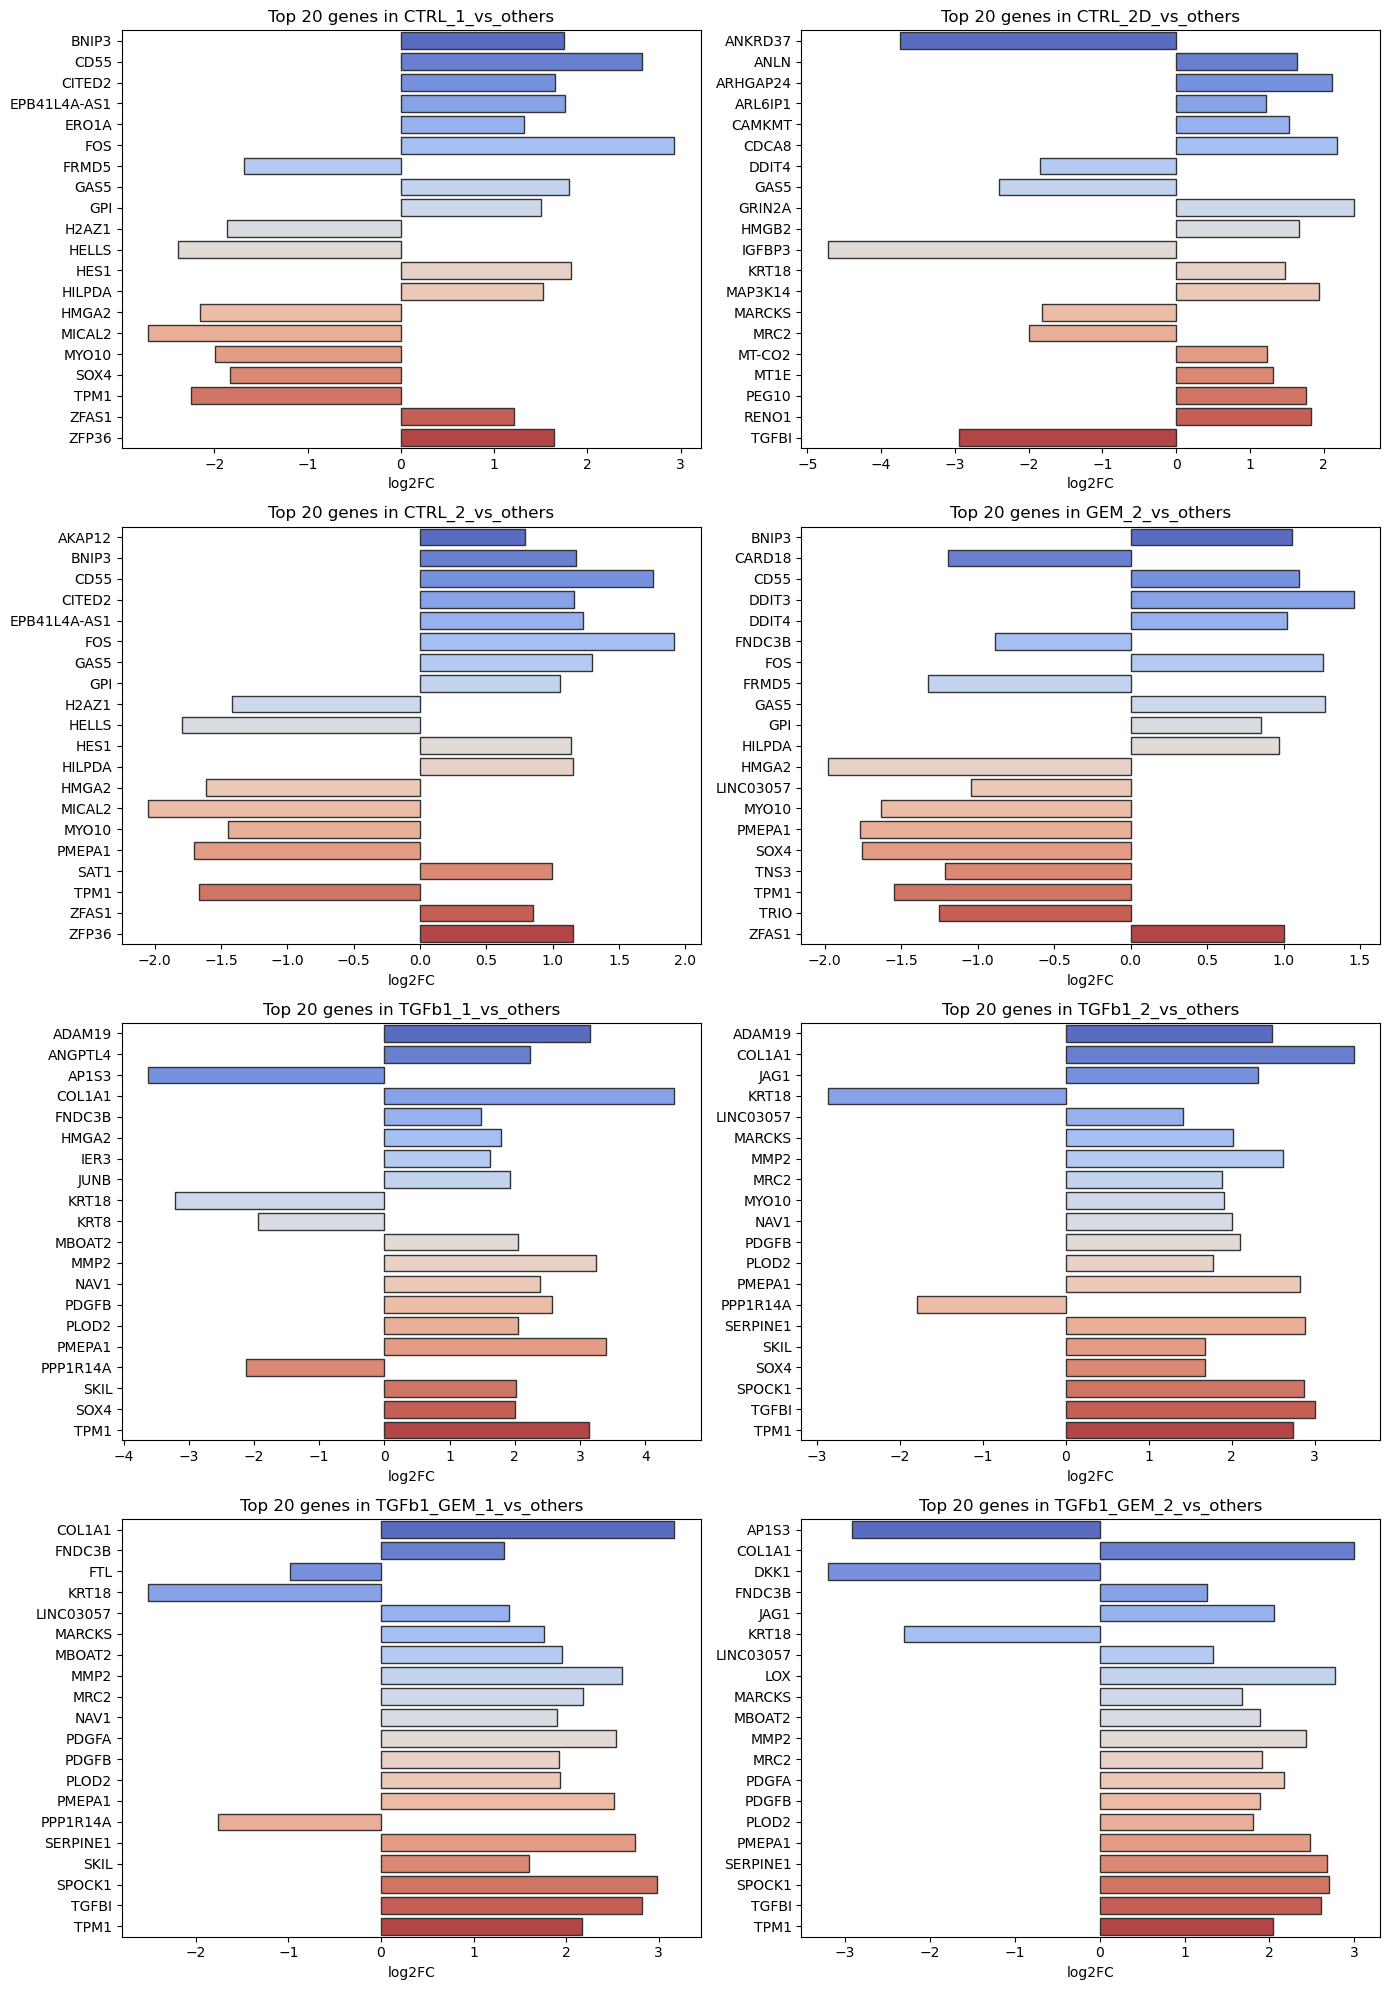

In [109]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded your dataframe as results_df
sorted_unique_comparisons = sorted(results_df['comparison'].unique())
print(sorted_unique_comparisons)

# Initialize the 4x2 subplot grid
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 20))
fig.subplots_adjust(hspace=0.5)  # Adjust space between plots

for index, comparison in enumerate(sorted_unique_comparisons):

    # Extract results for a specific comparison
    specific_comparison = comparison  # example
    filtered_results = results_df[results_df['comparison'] == specific_comparison]
    
    # Visualize the top genes
    # Sort by adjusted p-value and pick tops n genes
    n_top_genes = 20  # for instance
    #top_genes = filtered_results.sort_values(by="adjusted.p.value", ascending=True).head(n_top_genes)
    print(top_genes)
    # Get top 20 genes by adjusted.p.value
    top_by_pvalue = filtered_results.sort_values(by="adjusted.p.value", ascending=True).head(n_top_genes)
    
    # Now, sort those top 20 genes by symbol
    top_genes = top_by_pvalue.sort_values(by="symbol", ascending=True)

    
    
    # Generate a bar plot in the appropriate subplot
    ax = axes[index // 2, index % 2]  # Determine the row and column for subplot
    sns.barplot(data=top_genes, x="log2FC", y="symbol", palette="coolwarm", edgecolor=".2", ax=ax)
    ax.set_title(f"Top {n_top_genes} genes in {comparison}")
    ax.set_xlabel('log2FC')  # Set x-axis label
    ax.set_ylabel('')  # Clear y-axis label for brevity

plt.tight_layout()
plt.show()

In [118]:
import os
# Save the figure
fig.savefig('figures/comparisons_plot.png', bbox_inches='tight')

## Visualize shared Top Gene between conditions

/home2/lumpi/miniconda3/envs/scanpy-env3/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/home2/lumpi/miniconda3/envs/scanpy-env3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/home2/lumpi/miniconda3/envs/scanpy-env3/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/home2/lumpi/miniconda3/envs/scanpy-env3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/home2/lumpi/miniconda3/envs/scanpy-env3/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/home2/lumpi/miniconda3/envs/scanpy-env3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarni

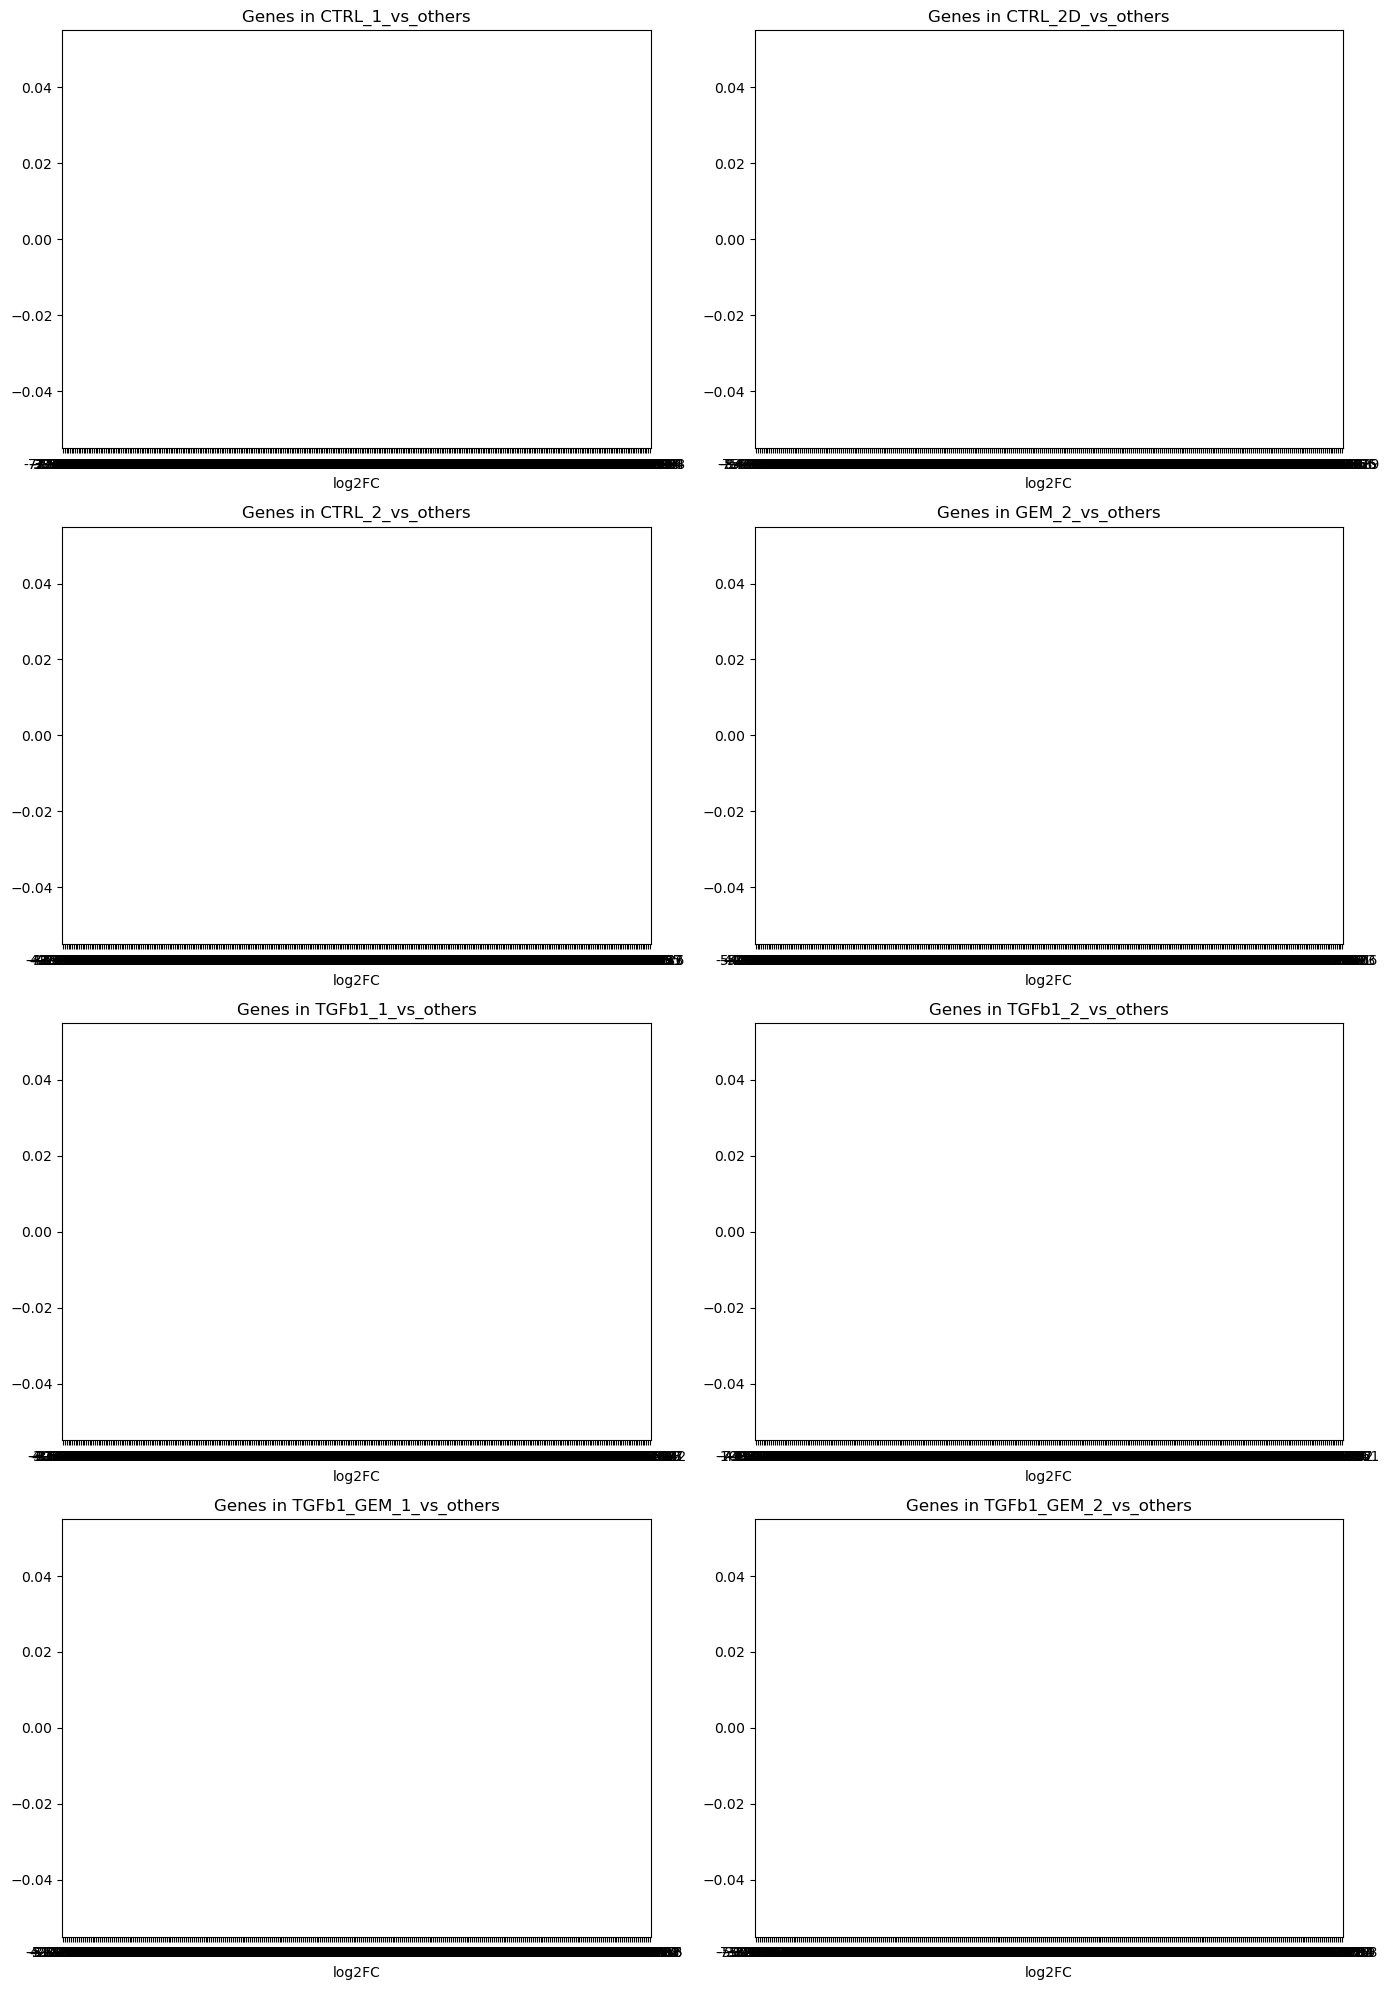

In [107]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded your dataframe as results_df
sorted_unique_comparisons = sorted(results_df['comparison'].unique())

# Extract top 30 genes from each condition
top_genes_per_comparison = {}
for comparison in sorted_unique_comparisons:
    filtered_results = results_df[results_df['comparison'] == comparison]
    top_genes = filtered_results.sort_values(by="adjusted.p.value", ascending=True).head(160)['symbol'].tolist()
    top_genes_per_comparison[comparison] = set(top_genes)

# Intersect top genes across all conditions
intersected_genes = set.intersection(*top_genes_per_comparison.values())
intersected_genes_sorted = sorted(list(intersected_genes))

# Initialize the 4x2 subplot grid
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 20))
fig.subplots_adjust(hspace=0.5)  # Adjust space between plots

for index, comparison in enumerate(sorted_unique_comparisons):

    # Extract results for a specific comparison
    specific_comparison = comparison  # example
    filtered_results = results_df[results_df['comparison'] == specific_comparison]
    
    # Filter the results to only show the intersected and sorted genes
    top_genes_data = filtered_results[filtered_results['symbol'].isin(intersected_genes_sorted)]
    
    # Sort the results according to the order in intersected_genes_sorted
    top_genes_data = top_genes_data.set_index('symbol').loc[intersected_genes_sorted].reset_index()
    
    # Generate a bar plot in the appropriate subplot
    ax = axes[index // 2, index % 2]  # Determine the row and column for subplot
    sns.barplot(data=top_genes_data, x="log2FC", y="symbol", palette="coolwarm", edgecolor=".2", ax=ax)
    ax.set_title(f"Genes in {comparison}")
    ax.set_xlabel('log2FC')  # Set x-axis label
    ax.set_ylabel('')  # Clear y-axis label for brevity

plt.tight_layout()
plt.show()

In [108]:
top_genes_data

,symbol,comparison,ID,basemean,log2FC,p.value,adjusted.p.value
0,NaN,TGFb1_GEM_2_vs_others,ENSG00000251088,-0.016471,0.645327,1.219825e-55,4.517870e-54
1,NaN,TGFb1_GEM_2_vs_others,ENSG00000267098,-0.017085,-0.576930,1.361722e-55,4.924218e-54
2,NaN,TGFb1_GEM_2_vs_others,ENSG00000231811,-0.015402,NaN,1.582028e-55,5.436452e-54
3,NaN,TGFb1_GEM_2_vs_others,ENSG00000232667,-0.018456,1.036828,1.714250e-55,5.714165e-54
4,NaN,TGFb1_GEM_2_vs_others,ENSG00000287211,-0.013964,-0.317002,3.352715e-55,1.035550e-53
...,...,...,...,...,...,...,...
382,NaN,TGFb1_GEM_2_vs_others,ENSG00000272736,-0.017477,0.977606,1.603753e-55,5.436452e-54
383,NaN,TGFb1_GEM_2_vs_others,ENSG00000255745,-0.015230,0.934118,8.254709e-56,3.174888e-54
384,NaN,TGFb1_GEM_2_vs_others,ENSG00000226872,-0.014116,1.281975,8.198460e-56,3.174888e-54
385,NaN,TGFb1_GEM_2_vs_others,ENSG00000267677,-0.009914,1.317247,5.066716e-56,2.111132e-54


## Volcanos

In [21]:
#!pip install adjustText

Defaulting to user installation because normal site-packages is not writeable
  Using cached adjustText-0.8-py3-none-any.whl (9.1 kB)


['CTRL_1_vs_others', 'CTRL_2D_vs_others', 'CTRL_2_vs_others', 'GEM_2_vs_others', 'TGFb1_1_vs_others', 'TGFb1_2_vs_others', 'TGFb1_GEM_1_vs_others', 'TGFb1_GEM_2_vs_others']


/tmp/ipykernel_1269865/513631769.py:66: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


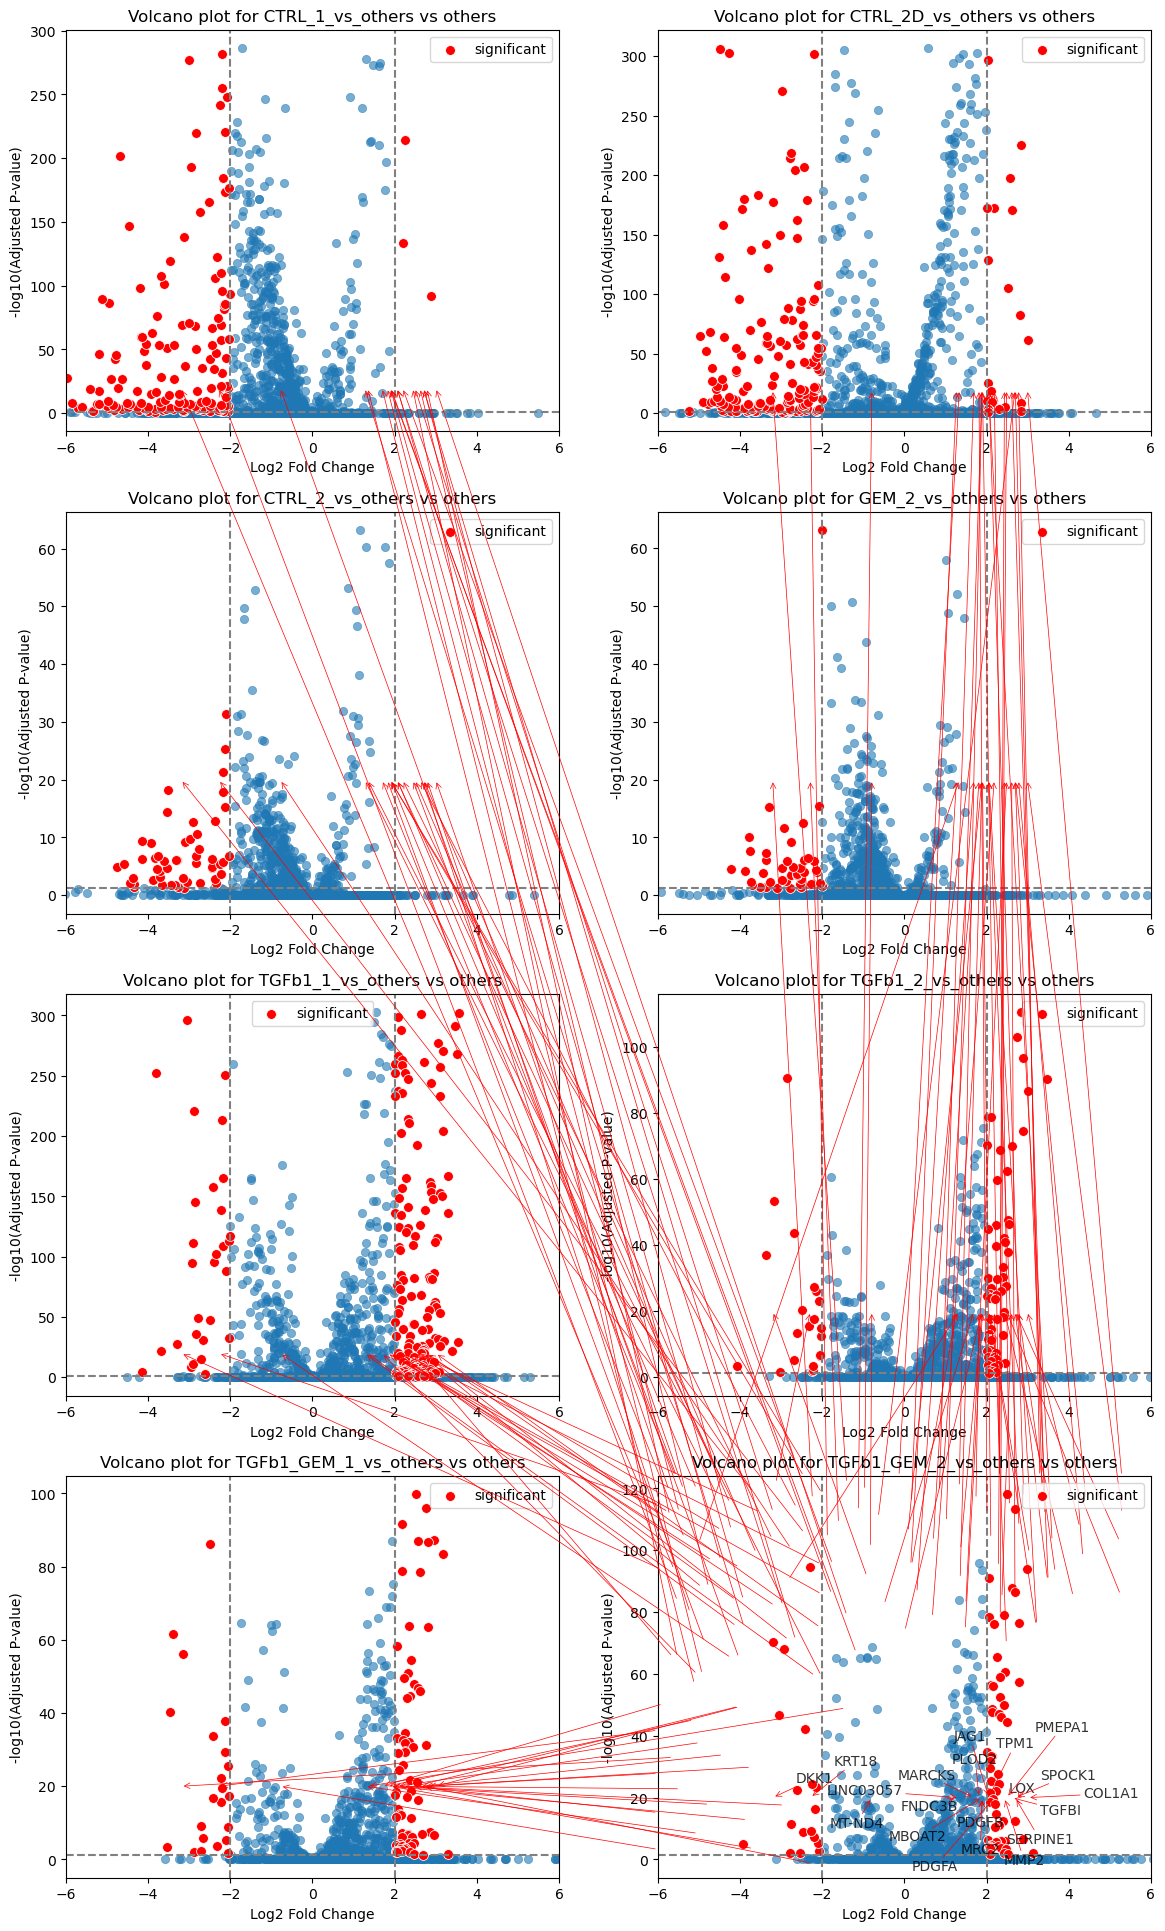

In [29]:
import os
import numpy as np
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

# ... [your code to load results_df]

sorted_unique_comparisons = sorted(results_df['comparison'].unique())
print(sorted_unique_comparisons)

# Prepare for subplots
n_cols = 2
n_rows = 4  # for 8 plots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 24))

texts = []  # Collecting texts to adjust their positions later

for idx, comparison in enumerate(sorted_unique_comparisons):

    # Extract results for a specific comparison
    specific_comparison = comparison
    filtered_results = results_df[results_df['comparison'] == specific_comparison]
    
    # Create a volcano plot
    ax = axes[idx // n_cols, idx % n_cols]
    sns.scatterplot(data=filtered_results, 
                    x="log2FC", 
                    y=-filtered_results['adjusted.p.value'].apply(np.log10), 
                    ax=ax, alpha=0.6, edgecolor=None)

    # Highlight significant genes
    significant = filtered_results[(filtered_results['log2FC'].abs() > 2) & (filtered_results['adjusted.p.value'] < 0.05)]
    sns.scatterplot(data=significant, 
                    x="log2FC", 
                    y=-significant['adjusted.p.value'].apply(np.log10), 
                    ax=ax, color='red', s=50, label='significant')
    
    # Annotate the top twenty significant genes
    #top_genes = significant.sort_values(by="adjusted.p.value", ascending=True).head(20)
    #for _, row in top_genes.iterrows():
    #    texts.append(ax.text(row['log2FC'], -np.log10(row['adjusted.p.value']), row['symbol'], fontsize=10, alpha=0.8))
    #epsilon = 1e-20  # a small constant
    for idx, row in top_genes.iterrows():
        # Prevent adjusted p-values of exactly 0 by adding a small constant
        adj_pval = row['adjusted.p.value'] + epsilon
        y_val = -np.log10(adj_pval)
        
        # Check for infinite values
        if np.isfinite(y_val):
            texts.append(ax.text(row['log2FC'], y_val, row['symbol'], fontsize=10, alpha=0.8))
    
    ax.axhline(y=-np.log10(0.05), color='grey', linestyle='--')
    ax.axvline(x=2, color='grey', linestyle='--')
    ax.axvline(x=-2, color='grey', linestyle='--')
    ax.set_xlim([-6, 6])  # Set x range
    ax.set_title(f"Volcano plot for {comparison} vs others")
    ax.set_xlabel("Log2 Fold Change")
    ax.set_ylabel("-log10(Adjusted P-value)")

# Adjust text to prevent overlaps
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

plt.tight_layout()

# Save the figure
if not os.path.exists('figures'):
    os.makedirs('figures')
fig.savefig('figures/volcano_plots_adjusted.png', bbox_inches='tight')
plt.show()


/home2/lumpi/miniconda3/envs/scanpy-env3/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home2/lumpi/miniconda3/envs/scanpy-env3/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home2/lumpi/miniconda3/envs/scanpy-env3/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


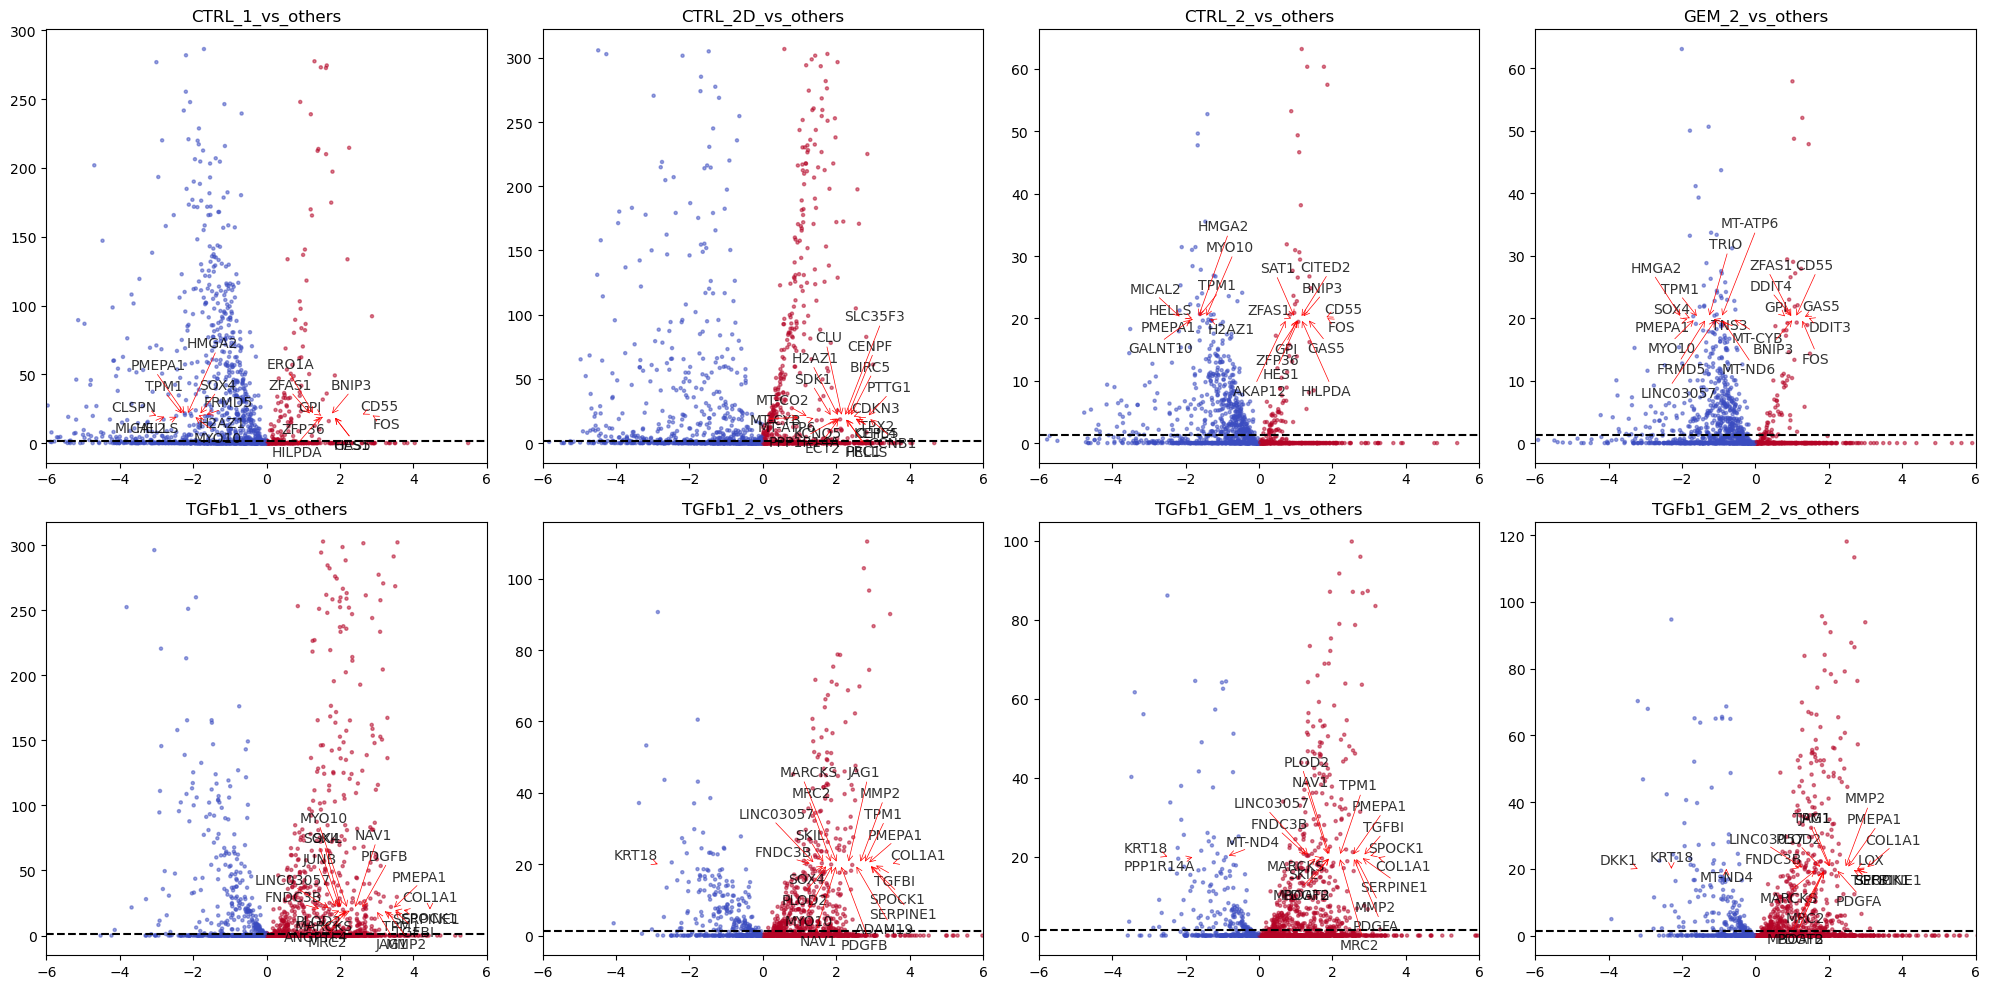

In [30]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from adjustText import adjust_text

# ... [rest of the code remains unchanged up to the plotting]

fig, axs = plt.subplots(2, 4, figsize=(20, 10))

for idx, comparison in enumerate(sorted_unique_comparisons):
    ax = axs[idx // 4, idx % 4]

    filtered_results = results_df[results_df['comparison'] == comparison]

    # Scatter points
    ax.scatter(filtered_results['log2FC'], -np.log10(filtered_results['adjusted.p.value']),
               c=np.sign(filtered_results['log2FC']), cmap="coolwarm", alpha=0.5, s=5)
    
    # Horizontal line for p-value significance threshold, e.g., 0.05
    ax.axhline(y=-np.log10(0.05), color='black', linestyle='--')
    
    ax.set_title(comparison)
    ax.set_xlim(-6, 6)
    
    # Annotate top genes
    top_genes = filtered_results.nsmallest(20, 'adjusted.p.value')
    
    texts = []
    epsilon = 1e-20  # a small constant
    for _, row in top_genes.iterrows():
        # Prevent adjusted p-values of exactly 0 by adding a small constant
        adj_pval = row['adjusted.p.value'] + epsilon
        y_val = -np.log10(adj_pval)
    
        # Check for infinite values
        if np.isfinite(y_val):
            texts.append(ax.text(row['log2FC'], y_val, row['symbol'], fontsize=10, alpha=0.8))
    
    adjust_text(texts, ax=ax, only_move={'points': 'y', 'text': 'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))
    
plt.tight_layout()
plt.savefig("figures/volcano_plots.png")
plt.show()


/home2/lumpi/miniconda3/envs/scanpy-env3/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home2/lumpi/miniconda3/envs/scanpy-env3/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home2/lumpi/miniconda3/envs/scanpy-env3/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


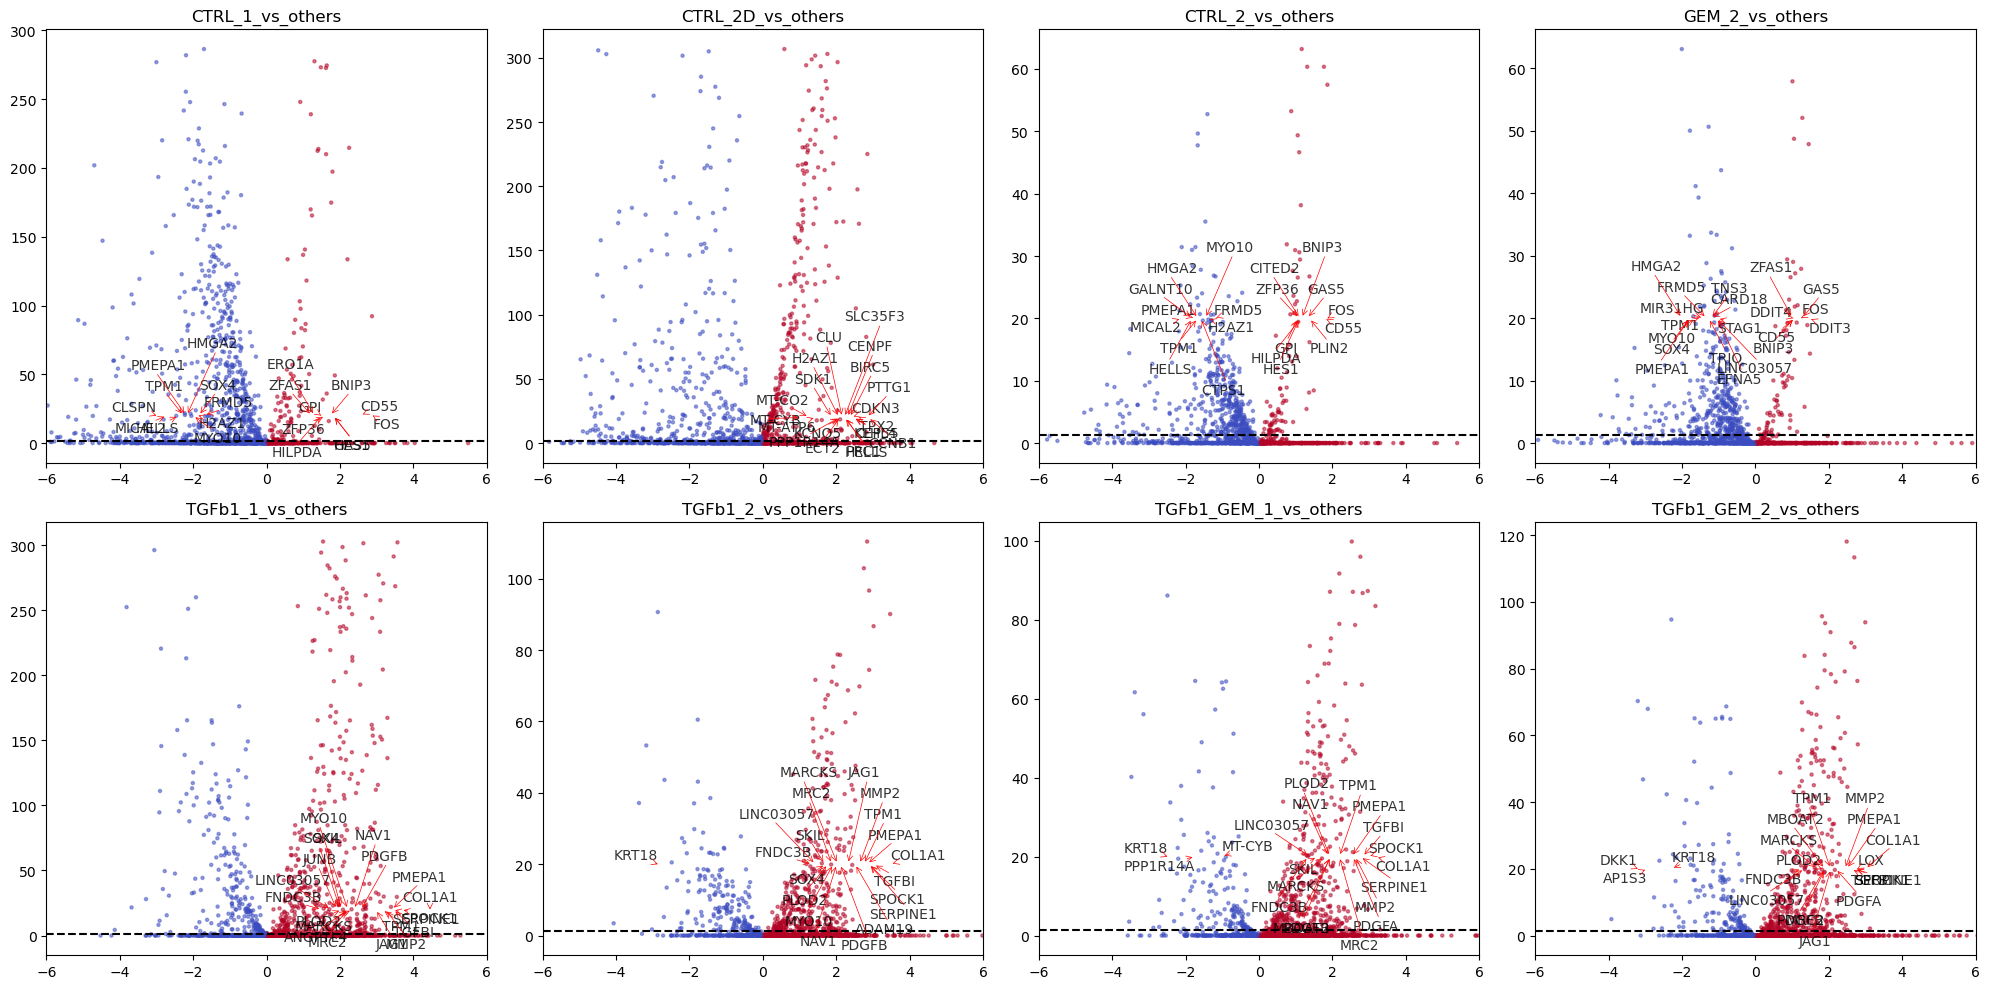

In [31]:
#... [previous part of the code]

fig, axs = plt.subplots(2, 4, figsize=(20, 10))

for idx, comparison in enumerate(sorted_unique_comparisons):
    ax = axs[idx // 4, idx % 4]

    filtered_results = results_df[results_df['comparison'] == comparison]

    # Scatter points
    ax.scatter(filtered_results['log2FC'], -np.log10(filtered_results['adjusted.p.value']),
               c=np.sign(filtered_results['log2FC']), cmap="coolwarm", alpha=0.5, s=5)
    
    # Horizontal line for p-value significance threshold, e.g., 0.05
    ax.axhline(y=-np.log10(0.05), color='black', linestyle='--')
    
    ax.set_title(comparison)
    ax.set_xlim(-6, 6)
    
    # Annotate significant genes based on fold change and adjusted p-value
    significant_genes = filtered_results[
        (filtered_results['log2FC'].abs() > 1) &  # You can adjust this threshold as per your requirement
        (filtered_results['adjusted.p.value'] < 0.05)
    ].nsmallest(20, 'adjusted.p.value')
    
    texts = []
    epsilon = 1e-20  # a small constant
    for _, row in significant_genes.iterrows():
        adj_pval = row['adjusted.p.value'] + epsilon
        y_val = -np.log10(adj_pval)
        if np.isfinite(y_val):
            texts.append(ax.text(row['log2FC'], y_val, row['symbol'], fontsize=10, alpha=0.8))
    
    adjust_text(texts, ax=ax, only_move={'points': 'y', 'text': 'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

plt.tight_layout()
plt.savefig("figures/volcano_plots.png")
plt.show()


In [32]:
plt.tight_layout()
plt.savefig("figures/volcano_plots.png")
plt.show()

<Figure size 640x480 with 0 Axes>

# Other Differential Analysis

In [ ]:
group1 = 'CTRL_1'
group2 = 'GEM_2'

In [44]:
# Subset the data to include only the specified groups
adata_subset = adata[adata.obs['condition'].isin([group1, group2])]


In [45]:
unique_categories = adata_subset.obs['condition'].unique()
print(unique_categories)

['CTRL_1', 'GEM_2']
Categories (2, object): ['CTRL_1', 'GEM_2']


In [46]:
# Perform differential expression analysis
sc.tl.rank_genes_groups(adata_subset, groupby='condition', groups=[group1, group2])

/home2/lumpi/miniconda3/envs/scanpy-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:580: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


In [47]:
# Get differentially expressed genes for the comparison
de_genes = adata_subset.uns['rank_genes_groups']['names'][group2]

In [48]:
# Print the DEGs
print(de_genes)

['ENSG00000164032' 'ENSG00000167900' 'ENSG00000166803' ...
 'ENSG00000171223' 'ENSG00000128016' 'ENSG00000160888']


In [22]:

#Specify the path for the output text file
output_file = '/storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_GEM_2/differentially_expressed_genes.txt'

# Write the DEGs to the output file
with open(output_file, 'w') as f:
    for gene in de_genes:
        f.write(f"{gene}\n")

print(f"Differentially expressed genes saved to {output_file}")

Differentially expressed genes saved to /storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_GEM_2/differentially_expressed_genes.txt


In [23]:
# Specify the groups you want to compare
group1 = 'CTRL_1'
group2 = 'TGFb1_1'
# Subset the data to include only the specified groups
adata_subset = adata[adata.obs['condition'].isin([group1, group2])]
# Perform differential expression analysis
sc.tl.rank_genes_groups(adata_subset, groupby='condition', groups=[group1, group2])
# Get differentially expressed genes for the comparison
de_genes = adata_subset.uns['rank_genes_groups']['names'][group2]
# Print the DEGs
print(de_genes)
#Specify the path for the output text file
output_file = '/storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_TGFb1_1/differentially_expressed_genes.txt'

# Write the DEGs to the output file
with open(output_file, 'w') as f:
    for gene in de_genes:
        f.write(f"{gene}\n")

print(f"Differentially expressed genes saved to {output_file}")

['ENSG00000124225' 'ENSG00000106366' 'ENSG00000140416' ...
 'ENSG00000176171' 'ENSG00000152056' 'ENSG00000111057']
Differentially expressed genes saved to /storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_TGFb1_1/differentially_expressed_genes.txt


/home2/lumpi/miniconda3/envs/scanpy-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:580: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


In [34]:
print(adata.obs['condition'])

barcode
AAACCCAGTAGGCTCC-1         CTRL_1
AAACCCAGTCGCAACC-1         CTRL_1
AAACCCATCCACAAGT-1         CTRL_1
AAACGCTTCACTACGA-1         CTRL_1
AAACGCTTCAGCCTCT-1         CTRL_1
                         ...     
TTTACTGTCATTACTC-1    TGFb1_GEM_2
TTTCACAGTGATATAG-1    TGFb1_GEM_2
TTTCACATCGATGCAT-1    TGFb1_GEM_2
TTTCATGTCCCTCTAG-1    TGFb1_GEM_2
TTTGACTGTTCCGGTG-1    TGFb1_GEM_2
Name: condition, Length: 11919, dtype: category
Categories (8, object): ['CTRL_1', 'CTRL_2', 'CTRL_2D', 'GEM_2', 'TGFb1_1', 'TGFb1_2', 'TGFb1_GEM_1', 'TGFb1_GEM_2']


In [24]:
# Specify the groups you want to compare
group1 = 'CTRL_1'
group2 = 'TGFb1_2'
# Subset the data to include only the specified groups
adata_subset = adata[adata.obs['condition'].isin([group1, group2])]
# Perform differential expression analysis
sc.tl.rank_genes_groups(adata_subset, groupby='condition', groups=[group1, group2])
# Get differentially expressed genes for the comparison
de_genes = adata_subset.uns['rank_genes_groups']['names'][group2]
# Print the DEGs
print(de_genes)
#Specify the path for the output text file
output_file = '/storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_TGFb1_2/differentially_expressed_genes.txt'

# Write the DEGs to the output file
with open(output_file, 'w') as f:
    for gene in de_genes:
        f.write(f"{gene}\n")

print(f"Differentially expressed genes saved to {output_file}")

['ENSG00000124225' 'ENSG00000140416' 'ENSG00000106366' ...
 'ENSG00000105220' 'ENSG00000111057' 'ENSG00000196352']
Differentially expressed genes saved to /storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_TGFb1_2/differentially_expressed_genes.txt


/home2/lumpi/miniconda3/envs/scanpy-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:580: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


In [25]:
# Specify the groups you want to compare
group1 = 'CTRL_1'
group2 = 'TGFb1_GEM_1'
# Subset the data to include only the specified groups
adata_subset = adata[adata.obs['condition'].isin([group1, group2])]
# Perform differential expression analysis
sc.tl.rank_genes_groups(adata_subset, groupby='condition', groups=[group1, group2])
# Get differentially expressed genes for the comparison
de_genes = adata_subset.uns['rank_genes_groups']['names'][group2]
# Print the DEGs
print(de_genes)
#Specify the path for the output text file
output_file = '/storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_TGFb1_GEM_1/differentially_expressed_genes.txt'

# Write the DEGs to the output file
with open(output_file, 'w') as f:
    for gene in de_genes:
        f.write(f"{gene}\n")

print(f"Differentially expressed genes saved to {output_file}")

['ENSG00000124225' 'ENSG00000106366' 'ENSG00000272763' ...
 'ENSG00000152056' 'ENSG00000196352' 'ENSG00000111057']
Differentially expressed genes saved to /storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_TGFb1_GEM_1/differentially_expressed_genes.txt


/home2/lumpi/miniconda3/envs/scanpy-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:580: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


In [26]:
# Specify the groups you want to compare
group1 = 'CTRL_1'
group2 = 'TGFb1_GEM_2'
# Subset the data to include only the specified groups
adata_subset = adata[adata.obs['condition'].isin([group1, group2])]
# Perform differential expression analysis
sc.tl.rank_genes_groups(adata_subset, groupby='condition', groups=[group1, group2])
# Get differentially expressed genes for the comparison
de_genes = adata_subset.uns['rank_genes_groups']['names'][group2]
# Print the DEGs
print(de_genes)
#Specify the path for the output text file
output_file = '/storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_TGFb1_GEM_2/differentially_expressed_genes.txt'

# Write the DEGs to the output fileTGFb1_GEM_2
with open(output_file, 'w') as f:
    for gene in de_genes:
        f.write(f"{gene}\n")

print(f"Differentially expressed genes saved to {output_file}")

['ENSG00000124225' 'ENSG00000106366' 'ENSG00000140416' ...
 'ENSG00000152056' 'ENSG00000196352' 'ENSG00000111057']
Differentially expressed genes saved to /storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_TGFb1_GEM_2/differentially_expressed_genes.txt


/home2/lumpi/miniconda3/envs/scanpy-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:580: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


In [27]:
#test

In [28]:
import scanpy as sc

# Specify the groups you want to compare
group1 = 'CTRL_1'
group2 = 'CTRL_2D'

# Subset the data to include only the specified groups
adata_subset = adata[adata.obs['condition'].isin([group1, group2])]

# Perform differential expression analysis
sc.tl.rank_genes_groups(adata_subset, groupby='condition', groups=[group1, group2])

# DEG-Ergebnisse abrufen
deg_results = adata.uns['rank_genes_groups']

# Gruppen und DEG-Informationen extrahieren
groups = deg_results['names'].dtype.names
deg_gene_lists = deg_results['names'].tolist()
deg_logfoldchanges = deg_results['logfoldchanges'].tolist()
deg_pvals_adj = deg_results['pvals_adj'].tolist()

# Ausgabe-Datei für Top-DEGs
output_file = '/storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_CTRL_2D/top_degs_between_conditions.txt'

# Write the DEGs and log2 fold changes to the output file
with open(output_file, 'w') as f:
    f.write("Condition\tGene\tLog2FoldChange\tAdjustedPValue\n")  # Header
    for group_idx, group in enumerate(groups):
        for gene, logfc, pval in zip(deg_gene_lists[group_idx], deg_logfoldchanges[group_idx], deg_pvals_adj[group_idx]):
            f.write(f"{group}\t{gene}\t{logfc}\t{pval}\n")

print(f"Differentially expressed genes and log2 fold changes saved to {output_file}")

/home2/lumpi/miniconda3/envs/scanpy-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:580: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


KeyError: 'rank_genes_groups'

In [29]:
output_file = '/storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_CTRL_2D/differentially_expressed_genes1.txt'  # Hier den Pfad zur Textdatei angeben

with open(file_path, 'r') as file:
    content = file.read()

print(content)

NameError: name 'file_path' is not defined

In [30]:
# Specify the groups you want to compare
group1 = 'CTRL_1'
group2 = 'CTRL_2D'
# Subset the data to include only the specified groups
adata_subset = adata[adata.obs['condition'].isin([group1, group2])]
# Perform differential expression analysis
sc.tl.rank_genes_groups(adata_subset, groupby='condition', groups=[group1, group2])
# Get differentially expressed genes for the comparison
de_genes = adata_subset.uns['rank_genes_groups']['names'][group2]
de_logfoldchanges = adata_subset.uns['rank_genes_groups']['logfoldchanges'][group2]

# Specify the path for the output text file
output_file = '/storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_CTRL_2D/differentially_expressed_genes.txt'

# Write the DEGs and log2 fold changes to the output file
with open(output_file, 'w') as f:
    for gene, logfc in zip(de_genes, de_logfoldchanges):
        f.write(f"{gene}\t{logfc}\n")  # Write gene name and logFC

print(f"Differentially expressed genes and log2 fold changes saved to {output_file}")


Differentially expressed genes and log2 fold changes saved to /storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_CTRL_2D/differentially_expressed_genes.txt


/home2/lumpi/miniconda3/envs/scanpy-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:580: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


In [34]:
import scanpy as sc

# Specify the groups you want to compare
group1 = 'CTRL_1'
group2 = 'CTRL_2D'

# Subset the data to include only the specified groups
adata_subset = adata[adata.obs['condition'].isin([group1, group2])]

# Perform differential expression analysis
sc.tl.rank_genes_groups(adata_subset, groupby='condition', groups=[group1, group2])

# Get differentially expressed genes for the comparison
de_genes = adata_subset.uns['rank_genes_groups']['names'][group2]
de_logfoldchanges = adata_subset.uns['rank_genes_groups']['logfoldchanges'][group2]
de_pvals_adj = adata_subset.uns['rank_genes_groups']['pvals_adj'][group2]

# Specify the path for the output text file
output_file = '/storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_CTRL_2D/differentially_expressed_genes1.txt'

# Write the DEGs and log2 fold changes to the output file
with open(output_file, 'w') as f:
    for gene, logfc in zip(de_genes, de_logfoldchanges, de_pvals_adj):
        f.write(f"{gene}\t{logfc}\n")  # Write gene name and logFC

print(f"Differentially expressed genes and log2 fold changes saved to {output_file}")


/home/sac43cg/miniconda3/envs/Gudruns_PDAC/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


ValueError: too many values to unpack (expected 2)

In [31]:
import scanpy as sc
import pandas as pd
# DEG-Analyse durchführen
sc.tl.rank_genes_groups(adata, groupby='cell_group_column', method='t-test', logfc_min=20)

# DEG-Ergebnisse abrufen
deg_results = adata.uns['rank_genes_groups']

# Listen der relevanten Informationen aus den DEG-Ergebnissen extrahieren
de_genes = deg_results['names'].dtype.names
de_logfoldchanges = deg_results['logfoldchanges'].dtype.names
de_pvals_adj = deg_results['pvals_adj'].dtype.names

# Ausgabe-Datei für Top-DEGs
output_file = 'top_degs.txt'

# Write the DEGs and log2 fold changes to the output file
with open(output_file, 'w') as f:
    for gene_list, logfc_list, pval_list in zip(de_genes, de_logfoldchanges, de_pvals_adj):
        f.write("Gene\tLog2FoldChange\tAdjustedPValue\n")  # Header
        for gene, logfc, pval in zip(gene_list, logfc_list, pval_list):
            f.write(f"{gene}\t{logfc}\t{pval}\n")

print(f"Differentially expressed genes and log2 fold changes saved to {output_file}")


KeyError: 'cell_group_column'